In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

In [2]:
U0 = lambda x: np.sin(2*np.pi*x/20)

In [3]:
h = 0.5
CFL = 0.6
tau = h * CFL
T1 = 18
L1 = 20
n = int(T1/tau) + 1
m = int(L1/h) + 1

In [4]:
sol = np.zeros((n,m))
for i in range(m):
    sol[0][i] = U0(i*h)
sol[0][0] = 0

In [5]:
for t in range(1, n):
    for x_ in range(1, m):
        sol[t][x_] = sol[t-1][x_] - (tau/h) * (sol[t-1][x_]-sol[t-1][x_-1])
    sol[t][0] = sol[t][m-1]

In [6]:
x = np.linspace(0, 20 , m)

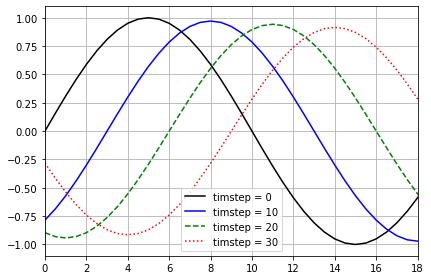

In [15]:
fig1 = plt.figure()
plt.plot(x, sol[0],'k-', label='timstep = 0')
plt.plot(x, sol[10],'b-', label='timstep = 10')
plt.plot(x, sol[20],'g--', label='timstep = 20')
plt.plot(x, sol[30],'r:', label='timstep = 30')
plt.grid()
plt.tight_layout()
plt.xlim(0, 18)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()
fig1.savefig('result.pdf')

In [16]:
fig = plt.figure()
plt.grid()
ax = plt.axes(xlim=(-0.5, 1.05*max(x)), ylim=(-1.1, 1.1))
ax.grid()
ax.set_title('Wave propagation with CFL = ' + str(CFL))
ax.set_xlabel('x')
ax.set_ylabel('solution')
line, = ax.plot([], [], lw=2)

def animate(i):
    line.set_data(x, sol[i])
    return line,

anim = FuncAnimation(fig, animate, frames=n, interval=2, blit=True)
plt.close()
anim.save('gifs/CFL=0.6_new_3.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


In [17]:
Image(url='gifs/CFL=0.6_new_3.gif')